In [96]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from math import pi

In [97]:
COLORS = ['red', 'green', 'blue', 'black', 'white', 'yellow']

def deg_to_cm1(x):
    return (abs(x) / 5 / 360) * pi * 3.04

def deg_to_cm2(x):
    return (abs(x) * (8 / 40 * 8 / 40) / 360) * pi * 3.04

def define_col(filename):
    if "black" in filename:
        return "black"
    elif "white" in filename:
        return "white"
    elif "red" in filename:
        return "red"
    elif "green" in filename:
        return "green"
    elif "blue" in filename:
        return "blue"
    elif "yellow" in filename:
        return "yellow"

def define_slow(filename):
    if "slow" in filename:
        return True
    return False


data = pd.DataFrame()
for el in os.listdir("data/sensor_data/"):
    temp = pd.read_csv("data/sensor_data/" + el, names=['r', 'g', 'b', 'deg'], sep=';')
    temp['deg'] = np.abs(temp['deg'])
    temp['col'] = define_col(el)
    if define_slow(el):
        temp['dist'] = np.array([deg_to_cm2(deg) for deg in temp['deg']])
    else:
        temp['dist'] = np.array([deg_to_cm1(deg) for deg in temp['deg']])
    data = pd.concat([data, temp])


In [98]:
data['sum'] = data['r'] + data['g'] + data['b']

data['r_m'] = data['r'] / data['sum']
data['g_m'] = data['g'] / data['sum']
data['b_m'] = data['b'] / data['sum']

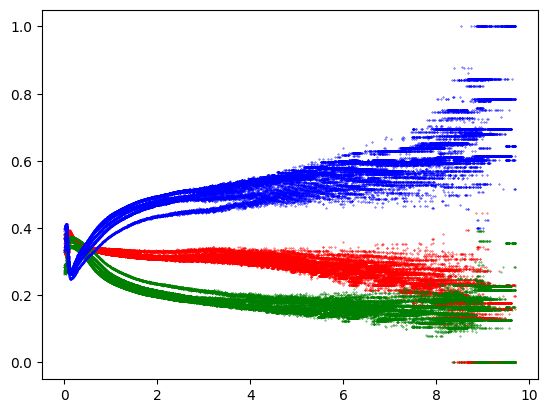

In [121]:
color = 'white'

fig, ax = plt.subplots()
ax.scatter(data[data['col'] == color]['dist'], data[data['col'] == color]['r_m'], s=0.1, color='red')
ax.scatter(data[data['col'] == color]['dist'], data[data['col'] == color]['g_m'], s=0.1, color='green')
ax.scatter(data[data['col'] == color]['dist'], data[data['col'] == color]['b_m'], s=0.1, color='blue')

In [117]:
def detect_col_func(r, g, b):
    sum = r + g + b
    if sum > 0:
        r_r = r / sum
        g_r = g / sum
        b_r = b / sum
        if 0.15 <= r_r <= 0.4 and 0.1 <= g_r <= 0.4 and 0.2 <= b_r <= 0.75:
            return "white"
        elif r_r >= 1 / 4:
            return "red"
        elif g_r >= 1 / 4:
            return "green"
        elif b_r >= 1 / 4:
            return "blue"
    return "black"

In [118]:
data['d_col'] = [detect_col_func(el['r'], el['g'], el['b']) for _, el in data.iterrows()]

In [119]:
data['correct'] = [int(el) for el in data['col'] == data['d_col']]

In [120]:
for col in COLORS:
    print(col, "  success:  ", data[data['col'] == col]['correct'].sum() / len(data[data['col'] == col]))

red   success:   0.9194971389914592
green   success:   0.7177383592017739
blue   success:   0.9354741063996166
black   success:   0.0002901915264074289
white   success:   0.0
yellow   success:   0.0
